In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
from keras.models import Sequential

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


##### Pre-processing of data

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
# performing the reshaping of data
# here 1 means no channel(no RGB channels)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
# Normalisation

x_train = x_train / 255
x_test = x_test / 255

In [9]:
# one- hot encoding

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### LeNet-5 Model Arcitecture

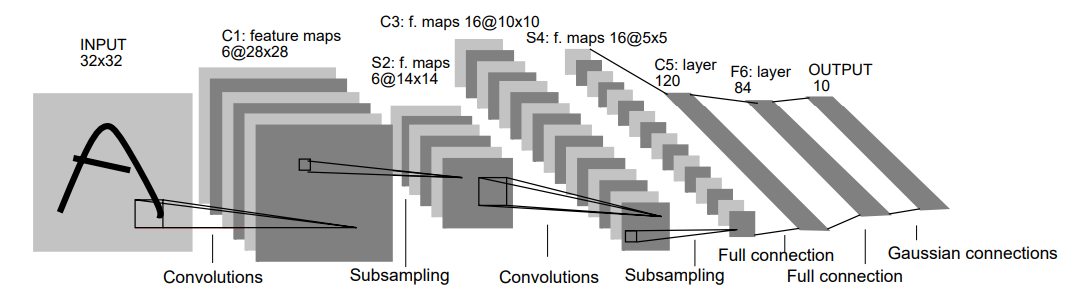

In [16]:
model = Sequential()

# adding the conv layer 1
model.add(Conv2D(6, kernel_size=(5,5), padding='valid', activation='tanh', input_shape=(28,28,1)))
# adding the average pooling layer for layer 1
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))


# adding the conv layer 2
model.add(Conv2D(16, kernel_size=(5,5), padding='valid', activation='tanh'))
# adding the average pooling layer for layer 2
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))


# adding the flatten layer
model.add(Flatten())


# Adding the Dense layers
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 12, 12, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [18]:
model.compile(loss= keras.metrics.categorical_crossentropy,
              optimizer =keras.optimizers.Adam(),
              metrics= ['Accuracy'])

In [19]:
model.fit(x_train, y_train, batch_size= 128, epochs=10, verbose= 1,
          validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 21s 42ms/step - loss: 0.3497 - Accuracy: 0.8991 - val_loss: 0.1622 - val_Accuracy: 0.9525
Epoch 2/10
469/469 [==============================] - 20s 43ms/step - loss: 0.1356 - Accuracy: 0.9581 - val_loss: 0.0929 - val_Accuracy: 0.9710
Epoch 3/10
469/469 [==============================] - 20s 44ms/step - loss: 0.0894 - Accuracy: 0.9727 - val_loss: 0.0748 - val_Accuracy: 0.9770
Epoch 4/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0656 - Accuracy: 0.9801 - val_loss: 0.0604 - val_Accuracy: 0.9810
Epoch 5/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0524 - Accuracy: 0.9835 - val_loss: 0.0535 - val_Accuracy: 0.9820
Epoch 6/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0424 - Accuracy: 0.9871 - val_loss: 0.0463 - val_Accuracy: 0.9855
Epoch 7/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0356 - Accuracy: 0.9892 - val_loss: 0.0476 - val_Accuracy:

As our MNIST input data is (28x28) but the LeNet expects the input images as (32x32). Therefore it is giving error.

After applying the input size as (28x28), you can see above there is no error and has executed successfully.

http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf

In [20]:
# evaluating the model
score = model.evaluate(x_test, y_test)

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.0419 - Accuracy: 0.9858
Test Loss: 0.041913703083992004
Test accuracy: 0.98580002784729
